<h1><b>Классификатор токсичных комментариев(Toxic Comments Classifier )</b></h1>

<h2><b>Цель работы:</b></h2>

 Постройте многоголовую модель, способную обнаруживать и определять вероятности для различных типов токсичности, таких как:

* токсичный(toxic)
* сильная токсичность(severe toxic)
* непристойный(obscene)
* угроза(threat)
* оскорбление(insult)
* ненависть к личности(identity hate)



### Импортируйте соответствующие библиотеки и загрузите данные (Import relevant libraries and load the data)

In [2]:
# Install the nltk library in case you have not yet installed it
# pip stands for preferred installer program under Python Package Index (PyPI)

!pip install nltk

In [3]:
#Import relevant packages
import matplotlib.pyplot as plt
import nltk  #natural languege tool kit
import numpy as np
import re  #regular expression
import pandas as pd
import string 
import seaborn as sns

from nltk.corpus import stopwords  #remove useless words


#Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [4]:
#if there is any bug ,to download again stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gavindu
[nltk_data]     Sajeendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Загрузите CSV и проверьте 1–5 строк (load the CSV and check 1 - 5  rows)

In [6]:
data = pd.read_csv('train.csv')
data.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Data set is clean.there are no missing values.

### Проверьте первые 3 комментария (Check the first 3 comments)

In [8]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [10]:
data['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

The comments are dirty with '\n' values, symbols, numbers that will not be useful for analysis. We will be removing these further down the pipeline.

### Исследовательский анализ данных (Exploratory Daya Analysis)

In [11]:
#Check percentage of comments that are toxic  compared to normal comments
data.toxic.value_counts(normalize=True) 

0    0.904156
1    0.095844
Name: toxic, dtype: float64

По результату кажется, что 90% комментариев относятся к категории токсичных.

In [12]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data.iloc[:,2:].sum()

In [14]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

C:\Anaconda3\envs\toxic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


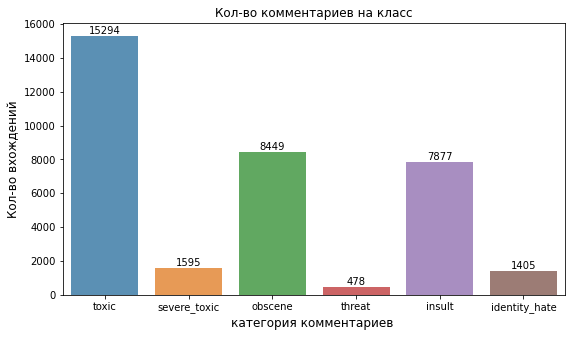

In [15]:
#According to below size ploting a chart
plt.figure(figsize=(9,5)) 

#to show the category values ploting the bar chart .to make more translucent choose as alpha = 0.8
ax = sns.barplot(data_count.index,data_count.values, alpha = 0.8)

plt.title("Кол-во комментариев на класс")
plt.ylabel('Кол-во вхождений', fontsize=12)
plt.xlabel('категория комментариев ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,height + 5, label, ha ='center', va ='bottom')
plt.show()    

In [16]:
num_rows = len(data)
print(num_rows)

159571


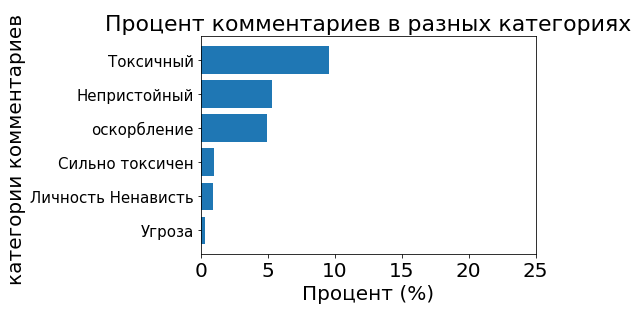

In [17]:
#create a bar graph
#find the peercentage for each cetegory
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

#initiate a list of 6 values that represent the 6 x-axis  values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the percentage of toxicity for each category be the y-axis.
# Sequence of percentage have been sorted manually. This method cannot be done if there are large numbers of categories. 
ax = plt.barh(ind,[sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Процент (%)', size =20)
plt.ylabel('категории комментариев ', size =20)
plt.xticks(np.arange(0, 30, 5), size =20)
plt.title('Процент комментариев в разных категориях', size=22)
plt.yticks(ind, ('Токсичный', 'Непристойный', 'оскорбление', 'Сильно токсичен', 'Личность Ненависть', 'Угроза', ), size = 15)

#Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

### Предварительно обработать текст (Preprocess the text) 

In [18]:
#for tokenizing and stemming
nltk.download('punkt')
    
    

[nltk_data] Downloading package punkt to C:\Users\Gavindu
[nltk_data]     Sajeendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer


porter=PorterStemmer()

def stemSentence(comment):
    token_words=word_tokenize(comment)
    token_words
    stem_comment=[]
    for word in token_words:
        stem_comment.append(porter.stem(word))
        stem_comment.append(" ")
    return "".join(stem_comment)

#s = stemSentence(data['comment_text'])
#data['comment_text'] = data['comment_text'].map(stemSentence)


for i in range(0, 1000):
    data['comment_text'][i]=stemSentence(data['comment_text'][i])
    
data.head(20)    

<ipython-input-19-143e8b8af226>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment_text'][i]=stemSentence(data['comment_text'][i])


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan whi the edit made under my usernam hard...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww ! he match thi background colour i 'm se...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man , i 'm realli not tri to edit war . it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,`` more i ca n't make ani real suggest on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,"you , sir , are my hero . ani chanc you rememb...",0,0,0,0,0,0
5,00025465d4725e87,"`` congratul from me as well , use the tool we...",0,0,0,0,0,0
6,0002bcb3da6cb337,cocksuck befor you piss around on my work,1,1,1,0,1,0
7,00031b1e95af7921,your vandal to the matt shirvington articl ha ...,0,0,0,0,0,0
8,00037261f536c51d,sorri if the word 'nonsens ' wa offens to you ...,0,0,0,0,0,0
9,00040093b2687caa,align on thi subject and which are contrari to...,0,0,0,0,0,0


In [20]:
import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('english'))

def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    txt = str(text)
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    txt = txt.replace("--th", " ")
    
    #text preprocessing steps -> remove numbers, capital letters, punctuation, '\n'
    #remove all numbers with letters attached to them
    #re.sub - replce to space ' '
    txt = re.sub('\w*\d\w*',' ',txt)
    
    #remove all '\n' in the string and replace  it with  a space
    txt = re.sub("\n", " ", txt)
    
    # Remove all non-ascii characters 
    txt=  re.sub(r'[^\x00-\x7f]',r' ', txt)
    
    
    # More cleaning
    txt = re.sub(r"alot", "a lot", txt)
    txt = re.sub(r"what's", "", txt)
    txt = re.sub(r"What's", "", txt)
    
    
    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    
    # Remove punctuation from text
    txt = ''.join([c for c in text if c not in punctuation])
    
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stop_words])
        
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

In [96]:
data['comment_text'] = data['comment_text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=True, lemmatization = False))

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
data.head(20)

## Разделите наш набор данных на 6 разделов. Каждый раздел - это комментарий + 1 категория.

In [23]:
data_tox = data.loc[:,['id','comment_text','toxic']]

In [24]:
data_tox['comment_text'][0]

'explan whi edit made usernam hardcor metallica fan revert nt vandal closur ga vote new york doll fac pleas nt remov templat talk page sinc retir'

In [25]:
data_tox['comment_text'][1]

'daww match thi background colour seemingli stuck thank talk januari utc'

In [26]:
data_tox['comment_text'][2]

'hey man realli tri edit war thi guy constantli remov relev inform talk edit instead talk page seem care format actual info'

In [27]:
data_sev = data.loc[:,['id','comment_text','severe_toxic']]

In [28]:
data_sev['comment_text'][0]

'explan whi edit made usernam hardcor metallica fan revert nt vandal closur ga vote new york doll fac pleas nt remov templat talk page sinc retir'

In [29]:
data_obs = data.loc[:,['id','comment_text','obscene']]

In [30]:
data_obs['comment_text'][0]

'explan whi edit made usernam hardcor metallica fan revert nt vandal closur ga vote new york doll fac pleas nt remov templat talk page sinc retir'

In [31]:
data_thr = data.loc[:,['id','comment_text','threat']]

In [32]:
data_ins = data.loc[:,['id','comment_text','insult']]

In [33]:
data_ide = data.loc[:,['id','comment_text','identity_hate']]

## Набор данных балансировки

In [34]:
data_tox.head()

,id,comment_text,toxic
0,0000997932d777bf,explan whi edit made usernam hardcor metallica...,0
1,000103f0d9cfb60f,daww match thi background colour seemingli stu...,0
2,000113f07ec002fd,hey man realli tri edit war thi guy constantli...,0
3,0001b41b1c6bb37e,ca nt make ani real suggest improv wonder sect...,0
4,0001d958c54c6e35,sir hero ani chanc rememb page,0


In [35]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_1.shape

(5000, 3)

In [36]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]
data_tox_0.shape

(5000, 3)

In [37]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

### Не все категории содержат 5000 строк. Поэтому мы должны сначала посчитать их и уравновесить.

объединить 1595 сильно токсичных комментариев с другими 1595 нетоксичными комментариями, чтобы сформировать новый сбалансированный набор данных

In [38]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [39]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

In [40]:
data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [41]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [42]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

объединить 1912 комментариев, не являющихся угрозами, с 478 комментариями о лечении. 478 представляют 20% нового набора данных.

In [43]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]

data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [44]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [45]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [46]:
data_ide[data_ide['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [47]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7025, 3)

фреймы данных каждого класса, которые были сбалансированы (по крайней мере, соотношение 20/80)

|                      | DF name       | No. of pts (1) | No. of pts (0) | Total data pts |
|----------------------|---------------|----------------|----------------|----------------|
| Toxic                | data_tox_done | 5000           | 5000           | 10000          |
| Severe Toxic         | data_sev_done | 1595           | 1595           | 3190           |
| Obscene (8449)       | data_obs_done | 5000           | 5000           | 10000          |
| Threat (478)         | data_thr_done | 478            | 1912           | 2390           |
| Insult (7877)        | data_ins_done | 5000           | 5000           | 10000          |
| Identity Hate (1405) | data_ide_done | 1405           | 5620           | 7025           |

## Импортируйте соответствующие пакеты для моделирования

In [48]:
#import packages for preprocessing
from sklearn.feature_selection import SelectFromModel

#import tools to split data and evalute model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#import machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 




### Создать функцию, которая принимает набор данных и позволяет выбрать набор данных, метку токсичности, векторизатор и количество нграмм

In [49]:

#df_done: data_tox_done, data_sev_done, ...
#label: toxic, severe_toxic, ...
#vectorizer values: CountVectorizer, TfidfVectorizer
#gram_range values: (1,1) for unigram, (2,2) for bigram


def cv_tf_train_test(df_done,label,vectorizer,ngram):

    #Train/Test split
    # Split the data into X and y data sets #independant features
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #test percentage = 30% train = 70%

    #Count Vectorizer/TF-IDF

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    #test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    #Initialize all model objects and fit the models on the training data
    lr = LogisticRegression() #object creation
    lr.fit(X_train_cv1, y_train) #model training
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1


### создать объект векторизатора TF-IDF для каждой категории и вычислить оценки F1 для всех моделей

In [50]:
'''
function & parameters

def cv_tf_train_test(df_done,label,vectorizer,ngram)
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done,'toxic',TfidfVectorizer,(1,1))
df_tox_cv.rename(columns = {'F1 Score': 'toxic'}, inplace = True)

t1 = time.time()

total_tox = 'Time taken: {} seconds'.format(t1-t0)
print(total_tox)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 10.490163564682007 seconds


,toxic
Log Regression,0.867437
KNN,0.188746
BernoulliNB,0.784409
MultinomialNB,0.881133
SVM,0.876923
Random Forest,0.842473


In [51]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'severe_toxic'}, inplace=True)

t1 = time.time()

total_st = 'Time taken: {} seconds'.format(t1-t0)
print(total_st)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.5789785385131836 seconds


,severe_toxic
Log Regression,0.937434
KNN,0.886124
BernoulliNB,0.829861
MultinomialNB,0.943888
SVM,0.943633
Random Forest,0.947260


In [52]:

t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'obscene'}, inplace=True)

t1 = time.time()

total_ob = 'Time taken: {} seconds'.format(t1-t0)
print(total_ob)

df_obs_cv

lr done
bnb done
mnb done
rdf done
Time taken: 9.59969425201416 seconds


,obscene
Log Regression,0.911013
KNN,0.519708
BernoulliNB,0.798391
MultinomialNB,0.908682
SVM,0.923746
Random Forest,0.906051


In [53]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'threat'}, inplace=True)

t1 = time.time()

total_th = 'Time taken: {} seconds'.format(t1-t0)
print(total_th)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.1841142177581787 seconds


,threat
Log Regression,0.686192
KNN,0.760148
BernoulliNB,0.293478
MultinomialNB,0.551402
SVM,0.828571
Random Forest,0.811808


In [54]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'insult'}, inplace=True)

t1 = time.time()

total_in = 'Time taken: {} seconds'.format(t1-t0)
print(total_in)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 10.529224634170532 seconds


,insult
Log Regression,0.897654
KNN,0.234758
BernoulliNB,0.792239
MultinomialNB,0.906606
SVM,0.906551
Random Forest,0.897584


In [55]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'identity_hate'}, inplace=True)

t1 = time.time()

total_iha = t1-t0

total_iha = 'Time taken: {} seconds'.format(t1-t0)
print(total_iha)

df_ide_cv

lr done
bnb done
mnb done
rdf done
Time taken: 5.668972492218018 seconds


,identity_hate
Log Regression,0.687065
KNN,0.210101
BernoulliNB,0.387900
MultinomialNB,0.478114
SVM,0.801968
Random Forest,0.786600


In [56]:
total_iha

#[total_tox, total_st, total_ob, total_in, total_th, total_iha]
#time_all = pd.concat([total_tox, total_st, total_ob, total_in, total_th, total_iha, axis=1)
#time_all

'Time taken: 5.668972492218018 seconds'

### объединить фреймы данных в основной фрейм данных, чтобы сравнить оценки F1 по всем категориям.

In [57]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,toxic,severe_toxic,obscene,insult,threat,identity_hate
Log Regression,0.867437,0.937434,0.911013,0.897654,0.686192,0.687065
KNN,0.188746,0.886124,0.519708,0.234758,0.760148,0.210101
BernoulliNB,0.784409,0.829861,0.798391,0.792239,0.293478,0.387900
MultinomialNB,0.881133,0.943888,0.908682,0.906606,0.551402,0.478114
SVM,0.876923,0.943633,0.923746,0.906551,0.828571,0.801968
Random Forest,0.842473,0.947260,0.906051,0.897584,0.811808,0.786600


### Транспонируйте объединенный фрейм данных F1, чтобы сделать его подходящим для представления на графике


In [58]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
toxic,0.867437,0.188746,0.784409,0.881133,0.876923,0.842473
severe_toxic,0.937434,0.886124,0.829861,0.943888,0.943633,0.947260
obscene,0.911013,0.519708,0.798391,0.908682,0.923746,0.906051
insult,0.897654,0.234758,0.792239,0.906606,0.906551,0.897584
threat,0.686192,0.760148,0.293478,0.551402,0.828571,0.811808
identity_hate,0.687065,0.210101,0.387900,0.478114,0.801968,0.786600


Text(0.5, 0, 'категории комментариев ')

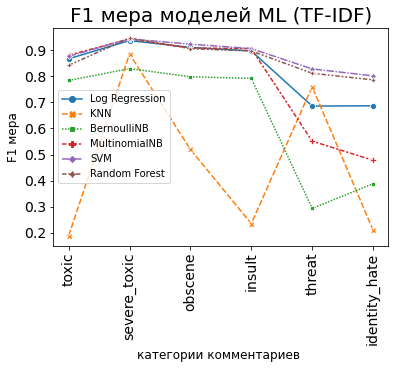

In [60]:
sns.lineplot(data=f1_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 мера моделей ML (TF-IDF)', fontsize=20)
plt.ylabel('F1 мера', fontsize=12)
plt.xlabel('категории комментариев ', fontsize=12)


### используя countvectorizer

In [61]:
t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done,'toxic',CountVectorizer,(1,1))
df_tox_cv.rename(columns = {'F1 Score': 'toxic'}, inplace = True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 11.506481885910034 seconds


,toxic
Log Regression,0.870152
KNN,0.669746
BernoulliNB,0.784409
MultinomialNB,0.865541
SVM,0.860981
Random Forest,0.842550


In [62]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', CountVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'severe_toxic'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.9227068424224854 seconds


,severe_toxic
Log Regression,0.934043
KNN,0.873984
BernoulliNB,0.829861
MultinomialNB,0.949117
SVM,0.933754
Random Forest,0.948133


In [63]:

t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', CountVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'obscene'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

C:\Anaconda3\envs\toxic\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr done
bnb done
mnb done


C:\Anaconda3\envs\toxic\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rdf done
Time taken: 11.34147596359253 seconds


,obscene
Log Regression,0.927682
KNN,0.789243
BernoulliNB,0.798391
MultinomialNB,0.910995
SVM,0.922667
Random Forest,0.917553


In [64]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', CountVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'threat'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.2945313453674316 seconds


,threat
Log Regression,0.788321
KNN,0.590164
BernoulliNB,0.293478
MultinomialNB,0.833898
SVM,0.814815
Random Forest,0.801418


In [65]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult',  CountVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'insult'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 11.695340633392334 seconds


,insult
Log Regression,0.911096
KNN,0.719093
BernoulliNB,0.792239
MultinomialNB,0.904019
SVM,0.894877
Random Forest,0.895593


In [66]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', CountVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'identity_hate'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

C:\Anaconda3\envs\toxic\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\envs\toxic\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


lr done
bnb done
mnb done
rdf done
Time taken: 6.084712028503418 seconds


,identity_hate
Log Regression,0.770807
KNN,0.616498
BernoulliNB,0.387900
MultinomialNB,0.782190
SVM,0.772947
Random Forest,0.785276


In [67]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,toxic,severe_toxic,obscene,insult,threat,identity_hate
Log Regression,0.870152,0.934043,0.927682,0.911096,0.788321,0.770807
KNN,0.669746,0.873984,0.789243,0.719093,0.590164,0.616498
BernoulliNB,0.784409,0.829861,0.798391,0.792239,0.293478,0.387900
MultinomialNB,0.865541,0.949117,0.910995,0.904019,0.833898,0.782190
SVM,0.860981,0.933754,0.922667,0.894877,0.814815,0.772947
Random Forest,0.842550,0.948133,0.917553,0.895593,0.801418,0.785276


In [68]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
toxic,0.870152,0.669746,0.784409,0.865541,0.860981,0.842550
severe_toxic,0.934043,0.873984,0.829861,0.949117,0.933754,0.948133
obscene,0.927682,0.789243,0.798391,0.910995,0.922667,0.917553
insult,0.911096,0.719093,0.792239,0.904019,0.894877,0.895593
threat,0.788321,0.590164,0.293478,0.833898,0.814815,0.801418
identity_hate,0.770807,0.616498,0.387900,0.782190,0.772947,0.785276


Text(0.5, 0, 'категории комментариев ')

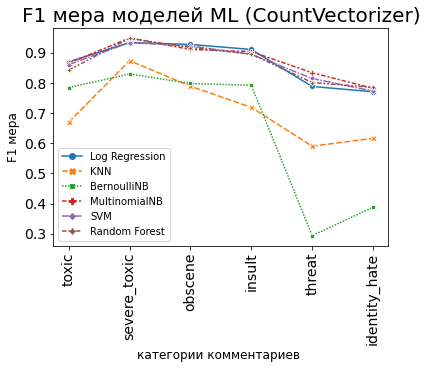

In [69]:
sns.lineplot(data=f1_all_trp,  markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 мера моделей ML (CountVectorizer)', fontsize=20)
plt.ylabel('F1 мера', fontsize=12)
plt.xlabel('категории комментариев ', fontsize=12)

### модификация для тестирования биграмм

In [70]:
t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done,'toxic',TfidfVectorizer,(2,2))
df_tox_cv.rename(columns = {'F1 Score': 'toxic'}, inplace = True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 33.84664821624756 seconds


,toxic
Log Regression,0.637475
KNN,0.565190
BernoulliNB,0.689283
MultinomialNB,0.663106
SVM,0.642552
Random Forest,0.544106


In [71]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (2,2))
df_sev_cv.rename(columns={'F1 Score': 'severe_toxic'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 4.209014415740967 seconds


,severe_toxic
Log Regression,0.782609
KNN,0.284746
BernoulliNB,0.676037
MultinomialNB,0.789352
SVM,0.782082
Random Forest,0.656552


In [72]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (2,2))
df_obs_cv.rename(columns={'F1 Score': 'obscene'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

lr done
bnb done
mnb done
rdf done
Time taken: 28.091366052627563 seconds


,obscene
Log Regression,0.715822
KNN,0.527243
BernoulliNB,0.688510
MultinomialNB,0.750444
SVM,0.728293
Random Forest,0.617021


In [73]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (2,2))
df_thr_cv.rename(columns={'F1 Score': 'threat'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 3.2361629009246826 seconds


,threat
Log Regression,0.188235
KNN,0.134078
BernoulliNB,0.012903
MultinomialNB,0.209302
SVM,0.518868
Random Forest,0.408163


In [74]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (2,2))
df_ins_cv.rename(columns={'F1 Score': 'insult'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 32.172361850738525 seconds


,insult
Log Regression,0.706778
KNN,0.231156
BernoulliNB,0.688481
MultinomialNB,0.728959
SVM,0.713702
Random Forest,0.532368


In [75]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'identity_hate'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

lr done
bnb done
mnb done
rdf done
Time taken: 5.771472454071045 seconds


,identity_hate
Log Regression,0.687065
KNN,0.210101
BernoulliNB,0.387900
MultinomialNB,0.478114
SVM,0.801968
Random Forest,0.786600


In [76]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,toxic,severe_toxic,obscene,insult,threat,identity_hate
Log Regression,0.637475,0.782609,0.715822,0.706778,0.188235,0.687065
KNN,0.565190,0.284746,0.527243,0.231156,0.134078,0.210101
BernoulliNB,0.689283,0.676037,0.688510,0.688481,0.012903,0.387900
MultinomialNB,0.663106,0.789352,0.750444,0.728959,0.209302,0.478114
SVM,0.642552,0.782082,0.728293,0.713702,0.518868,0.801968
Random Forest,0.544106,0.656552,0.617021,0.532368,0.408163,0.786600


In [77]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
toxic,0.637475,0.565190,0.689283,0.663106,0.642552,0.544106
severe_toxic,0.782609,0.284746,0.676037,0.789352,0.782082,0.656552
obscene,0.715822,0.527243,0.688510,0.750444,0.728293,0.617021
insult,0.706778,0.231156,0.688481,0.728959,0.713702,0.532368
threat,0.188235,0.134078,0.012903,0.209302,0.518868,0.408163
identity_hate,0.687065,0.210101,0.387900,0.478114,0.801968,0.786600


Text(0.5, 0, 'категории комментариев ')

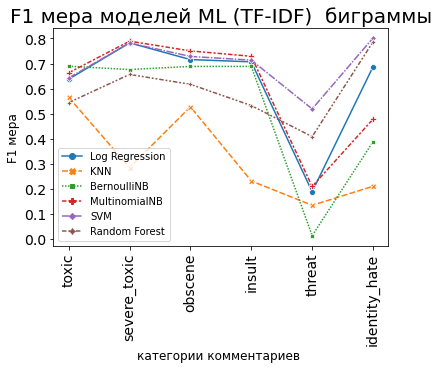

In [78]:
sns.lineplot(data=f1_all_trp,  markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 мера моделей ML (TF-IDF)  биграммы', fontsize=20)
plt.ylabel('F1 мера', fontsize=12)
plt.xlabel('категории комментариев ', fontsize=12)

### модификационный тест для трехграмм

In [79]:
t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done,'toxic',TfidfVectorizer,(3,3))
df_tox_cv.rename(columns = {'F1 Score': 'toxic'}, inplace = True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 42.78291344642639 seconds


,toxic
Log Regression,0.211299
KNN,0.671122
BernoulliNB,0.683263
MultinomialNB,0.213723
SVM,0.696349
Random Forest,0.689608


In [80]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (2,2))
df_sev_cv.rename(columns={'F1 Score': 'severe_toxic'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 3.6427247524261475 seconds


,severe_toxic
Log Regression,0.782609
KNN,0.284746
BernoulliNB,0.676037
MultinomialNB,0.789352
SVM,0.782082
Random Forest,0.656552


In [81]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (3,3))
df_obs_cv.rename(columns={'F1 Score': 'obscene'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

lr done
bnb done
mnb done
rdf done
Time taken: 38.80219531059265 seconds


,obscene
Log Regression,0.273523
KNN,0.228145
BernoulliNB,0.681304
MultinomialNB,0.277959
SVM,0.274659
Random Forest,0.688727


In [82]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (3,3))
df_thr_cv.rename(columns={'F1 Score': 'threat'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 4.1295037269592285 seconds


,threat
Log Regression,0.000000
KNN,0.098160
BernoulliNB,0.012903
MultinomialNB,0.050633
SVM,0.229885
Random Forest,0.209302


In [83]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (2,2))
df_ins_cv.rename(columns={'F1 Score': 'insult'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 28.232544898986816 seconds


,insult
Log Regression,0.706778
KNN,0.231156
BernoulliNB,0.688481
MultinomialNB,0.728959
SVM,0.713702
Random Forest,0.532368


In [84]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'identity_hate'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

lr done
bnb done
mnb done
rdf done
Time taken: 5.013112306594849 seconds


,identity_hate
Log Regression,0.687065
KNN,0.210101
BernoulliNB,0.387900
MultinomialNB,0.478114
SVM,0.801968
Random Forest,0.786600


In [85]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,toxic,severe_toxic,obscene,insult,threat,identity_hate
Log Regression,0.211299,0.782609,0.273523,0.706778,0.000000,0.687065
KNN,0.671122,0.284746,0.228145,0.231156,0.098160,0.210101
BernoulliNB,0.683263,0.676037,0.681304,0.688481,0.012903,0.387900
MultinomialNB,0.213723,0.789352,0.277959,0.728959,0.050633,0.478114
SVM,0.696349,0.782082,0.274659,0.713702,0.229885,0.801968
Random Forest,0.689608,0.656552,0.688727,0.532368,0.209302,0.786600


In [86]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
toxic,0.211299,0.671122,0.683263,0.213723,0.696349,0.689608
severe_toxic,0.782609,0.284746,0.676037,0.789352,0.782082,0.656552
obscene,0.273523,0.228145,0.681304,0.277959,0.274659,0.688727
insult,0.706778,0.231156,0.688481,0.728959,0.713702,0.532368
threat,0.000000,0.098160,0.012903,0.050633,0.229885,0.209302
identity_hate,0.687065,0.210101,0.387900,0.478114,0.801968,0.786600


Text(0.5, 0, 'категории комментариев ')

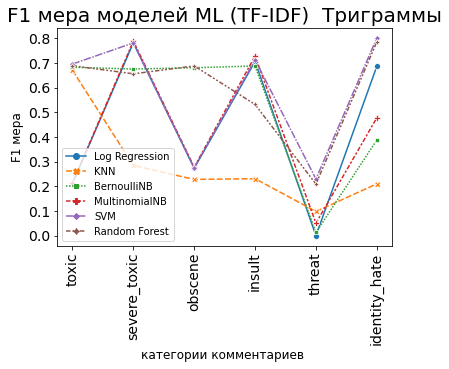

In [87]:
sns.lineplot(data=f1_all_trp, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 мера моделей ML (TF-IDF)  Триграммы', fontsize=20)
plt.ylabel('F1 мера', fontsize=12)
plt.xlabel('категории комментариев ', fontsize=12)

## Тестирование

### Проверьте, действительно ли наш код работает. Должна быть выведена вероятность попадания комментария в различные категории.

In [88]:
data_tox_done.head()

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksuck befor piss around work,1
12,0005c987bdfc9d4b,hey talk exclus group wp taliban good destroy ...,1
16,0007e25b2121310b,bye nt look come think com back tosser,1
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1
43,00190820581d90ce,fuck filthi mother ass dri,1


In [89]:
X = data_tox_done.comment_text
y =  data_tox_done['toxic']

X_train ,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state =42 )

#initiate a Tfidf vectorizer 
tfv = TfidfVectorizer(ngram_range = (1,1), stop_words = 'english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)

randomforest = RandomForestClassifier(n_estimators=100, random_state= 42)

randomforest.fit(X_train_fit,y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [90]:
#sample prediction примерный прогноз
comment1 = ['you are shit']
comment2 = ['never give up']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.9705119])

In [91]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.24484271])

комментарий 1 имеет близкую к 1 вероятность токсичности. это означает, что это токсичный комментарий, а комментарий 2 имеет низкую токсичность

### experiiment 2 stemming and lemmitization

In [92]:
#data_tox_done.head()

In [99]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)



In [100]:
x=stemSentence(sentence)
print(x)

NameError: name 'sentence' is not defined

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

## Травление обученных моделей RandomForest для всех категорий.

In [93]:
import pickle

### выберите объект векторизатора TF-IDF и модель RDF, обученную на соответствующем векторизаторе.

In [94]:
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]
    
    #intialize the Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    #convert X data into a documnet term matrix dataframe
    X_vect = tfv.fit_transform(X)
    
    #save the column label (vocablury)
    #writing to the binary, byte object
    with open(r"{}.pkl".format(label + '_vect'),"wb") as f:
        pickle.dump(tfv, f)

        
    randomforest = RandomForestClassifier(n_estimators =100, random_state=42)
    randomforest.fit(X_vect, y)
    
    #create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:
        pickle.dump(randomforest, f)
    
    
    

In [95]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)